In [11]:
# How to load image file as torch.tensor

In [40]:
import torch
import torchvision
import numpy as np
from PIL import Image

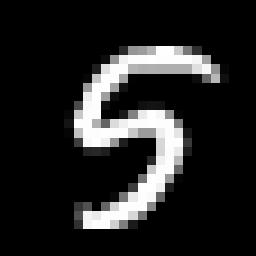

In [48]:
path = './sample_5.jpg'
img = Image.open(path)
img

In [49]:
img = img.resize((28, 28))

In [53]:
to_tensor = torchvision.transforms.ToTensor()

In [54]:
tensor = to_tensor(img)
tensor.shape

torch.Size([1, 28, 28])

In [55]:
tensor = tensor.unsqueeze(0)
tensor.shape

torch.Size([1, 1, 28, 28])

In [56]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3) # 28x28x32 -> 26x26x32
        self.conv2 = nn.Conv2d(32, 64, 3) # 26x26x64 -> 24x24x64 
        self.pool = nn.MaxPool2d(2, 2) # 24x24x64 -> 12x12x64
        self.dropout1 = nn.Dropout2d()
        self.fc1 = nn.Linear(12 * 12 * 64, 128)
        self.dropout2 = nn.Dropout2d()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = x.view(-1, 12 * 12 * 64)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [57]:
net_path = './net.pth'
net.load_state_dict(torch.load(net_path))

<All keys matched successfully>

In [58]:
out = net(tensor)
out.shape

torch.Size([1, 10])

In [59]:
out

tensor([[-0.5136, -2.4638,  0.0306,  0.9283, -0.2020,  2.0667, -0.5272, -0.7836,
          0.6916,  0.8129]], grad_fn=<AddmmBackward>)

In [60]:
out = out.detach().numpy()
out

array([[-0.51360476, -2.4637601 ,  0.03055451,  0.9282918 , -0.20204422,
         2.0666645 , -0.5272373 , -0.7836094 ,  0.69161296,  0.81286407]],
      dtype=float32)

In [61]:
out.shape

(1, 10)

In [62]:
pred = np.argmax(out, axis=1)
pred

array([5])